In [319]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('NC_listings.csv')
#df.plot(x='experience_district', y='salary', kind='scatter')
#plt.show()

df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [320]:
target = df[['price']]

In [321]:
target.columns

Index(['price'], dtype='object')

In [322]:
target.head()

,price
0,$55.00
1,$765.00
2,$75.00
3,$107.00
4,$71.00


In [323]:
len(target)

2441

In [325]:
##change prices to float values
array = []
for i in range(0,len(target)):
    num = float(df.price.iloc[i].strip('$').replace(',',''))
    array.append(num)
    
print(len(array))

2441


In [329]:
df.price = array
df.price.head()


2436     78.0
2437     58.0
2438    175.0
2439    195.0
2440    175.0
Name: price, dtype: float64

In [330]:
df.price.tail()

2436     78.0
2437     58.0
2438    175.0
2439    195.0
2440    175.0
Name: price, dtype: float64

In [338]:
df.price.max()

10000.0

In [345]:
df.price.min()

0.0

In [348]:
df.property_type.head(20)

0           House
1            Loft
2       Apartment
3      Guesthouse
4           House
5           House
6           House
7           House
8     Guest suite
9        Bungalow
10          Cabin
11      Apartment
12      Apartment
13     Guesthouse
14    Guest suite
15    Guest suite
16          House
17        Cottage
18          House
19      Apartment
Name: property_type, dtype: object

(array([1.63e+02, 1.31e+03, 5.51e+02, 2.82e+02, 0.00e+00, 9.30e+01,
        1.80e+01, 1.70e+01, 6.00e+00, 1.00e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

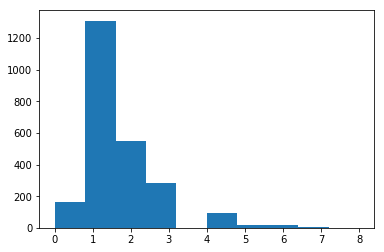

In [336]:
plt.hist(df.bedrooms)

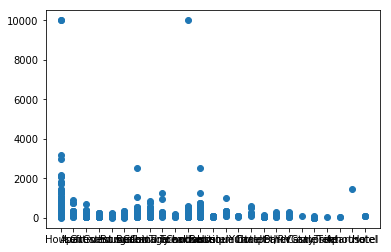

In [347]:
plt.scatter(df.property_type, df.price)